In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Iris.csv')

In [4]:
df.drop(columns=['Id'],inplace=True)

In [5]:
mapping = {
    "Iris-setosa": 'Setosa',
    "Iris-versicolor": 'Versicolor',
    "Iris-virginica": 'Virginica',
}

df["Species"] = df["Species"].map(mapping)

## Try out

In [6]:
from sklearn.datasets import load_iris

In [7]:
iris = load_iris()

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
data = pd.DataFrame(iris.data,columns=iris.feature_names)

In [10]:
data['target'] = iris.target

In [11]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
data['flower_names'] = data.target.apply(lambda x:iris.target_names[x])

In [13]:
data0 = data[data['target'] == 0]
data1 = data[data['target'] == 1]
data2 = data[data['target'] == 2]

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

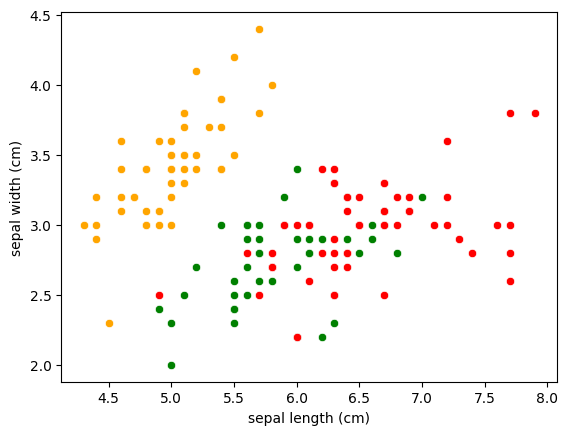

In [14]:
sns.scatterplot(x=data0['sepal length (cm)'],y=data0['sepal width (cm)'],color='orange')
sns.scatterplot(x=data1['sepal length (cm)'],y=data1['sepal width (cm)'],color='green')
sns.scatterplot(x=data2['sepal length (cm)'],y=data2['sepal width (cm)'],color='red')

## ending

In [15]:
data0 = df[df['Species'] == 'Setosa']
data1 = df[df['Species'] == 'Versicolor']
data2 = df[df['Species'] == 'Virginica']

<Axes: xlabel='PetalLengthCm', ylabel='SepalWidthCm'>

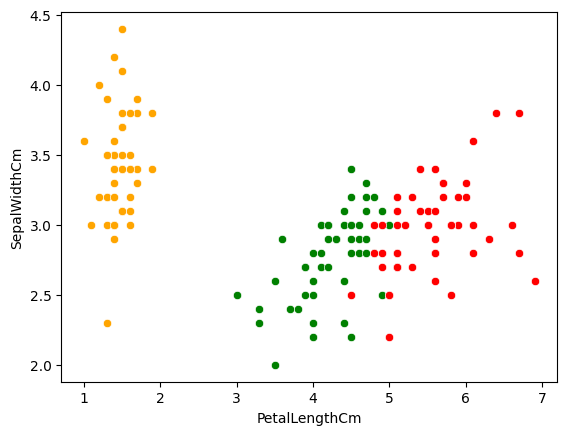

In [16]:
sns.scatterplot(x=data0['PetalLengthCm'],y=data0['SepalWidthCm'],color='orange')
sns.scatterplot(x=data1['PetalLengthCm'],y=data1['SepalWidthCm'],color='green')
sns.scatterplot(x=data2['PetalLengthCm'],y=data2['SepalWidthCm'],color='red')

<Axes: xlabel='SepalLengthCm', ylabel='PetalWidthCm'>

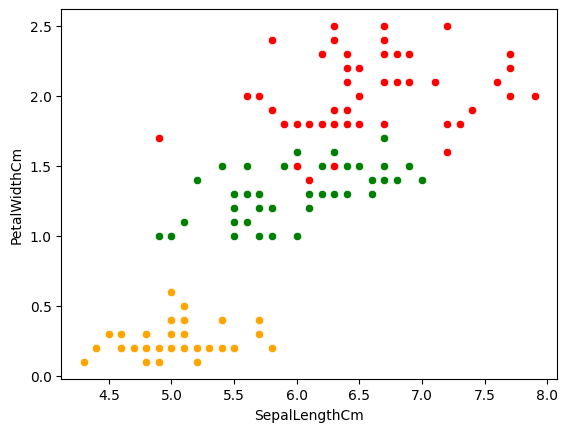

In [17]:
sns.scatterplot(x=data0['SepalLengthCm'],y=data0['PetalWidthCm'],color='orange')
sns.scatterplot(x=data1['SepalLengthCm'],y=data1['PetalWidthCm'],color='green')
sns.scatterplot(x=data2['SepalLengthCm'],y=data2['PetalWidthCm'],color='red')

In [18]:
X = df.drop(columns=['Species'])
y = df['Species']

In [19]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and temporary (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the temporary data into training (80%) and validation (20%)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

In [20]:
from sklearn.svm import SVC

In [34]:

from sklearn.model_selection import GridSearchCV 
param_grid = {'kernel': ('linear', 'rbf','poly') , 
              'C':[5, 10, 100],
              'gamma': [1,0.1,0.01,0.001], 
              'degree' : [1,2,3,4,5,6]}

grid = GridSearchCV(SVC() , param_grid , refit=True , verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5] END C=5, degree=1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END C=5, degree=1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END C=5, degree=1, gamma=1, kernel=linear;, score=0.944 total time=   0.0s
[CV 4/5] END C=5, degree=1, gamma=1, kernel=linear;, score=0.944 total time=   0.0s
[CV 5/5] END C=5, degree=1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END C=5, degree=1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END C=5, degree=1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END C=5, degree=1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5] END C=5, degree=1, gamma=1, kernel=rbf;, score=0.889 total time=   0.0s
[CV 5/5] END C=5, degree=1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END C=5, degree=1, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 2/5] END C=5, degree=1, g

GridSearchCV(estimator=SVC(),
             param_grid={'C': [5, 10, 100], 'degree': [1, 2, 3, 4, 5, 6],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ('linear', 'rbf', 'poly')},
             verbose=3)

In [35]:
print(grid.best_params_) 

{'C': 5, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}


In [45]:
svc = SVC(kernel='poly',degree=2,C=5,gamma=1)

In [46]:
svc.fit(X_test,y_test)

SVC(C=5, degree=2, gamma=1, kernel='poly')

X train

In [39]:
from sklearn.metrics import accuracy_score

predictions = svc.predict(X_train)
print("Accuracy Score =", format(accuracy_score(y_train,predictions)))

Accuracy Score = 1.0


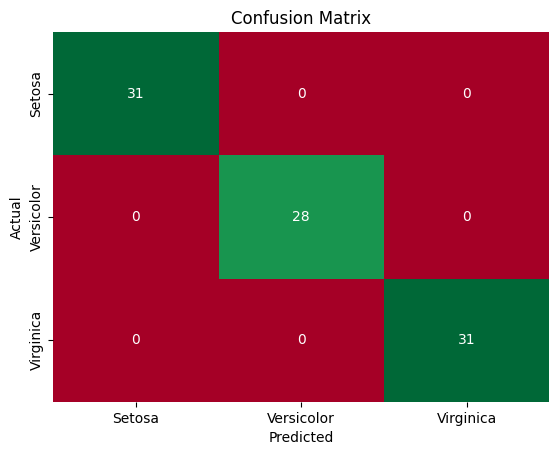

In [40]:
from sklearn.metrics import confusion_matrix

prediction = svc.predict(X_train)
cm = confusion_matrix(y_train, prediction)

labels = np.unique(y_test)
sns.heatmap(cm,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

X valid

In [43]:
from sklearn.metrics import accuracy_score

predictions = svc.predict(X_valid)
print("Accuracy Score =", format(accuracy_score(y_valid,predictions)))

Accuracy Score = 1.0


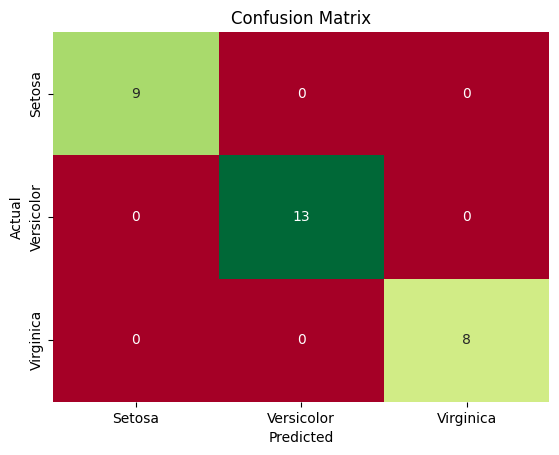

In [44]:
from sklearn.metrics import confusion_matrix

prediction = svc.predict(X_valid)
cm = confusion_matrix(y_valid, prediction)

labels = np.unique(y_valid)
sns.heatmap(cm,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

test

In [47]:
predictions = svc.predict(X_test)
print("Accuracy Score =", format(accuracy_score(y_test,predictions)))

Accuracy Score = 1.0


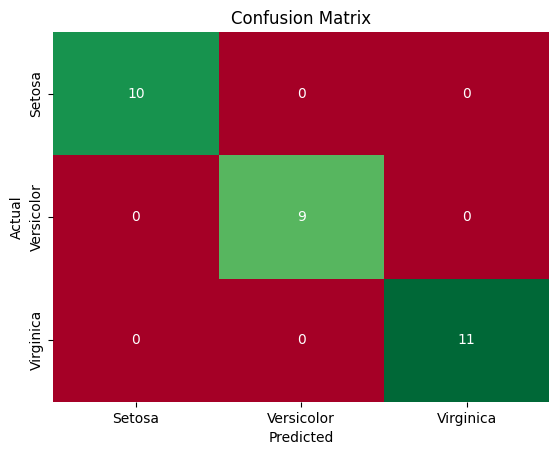

In [48]:
from sklearn.metrics import confusion_matrix

prediction = svc.predict(X_test)
cm = confusion_matrix(y_test, prediction)

labels = np.unique(y_test)
sns.heatmap(cm,annot=True,fmt='d',cmap='RdYlGn',cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()